In [136]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [137]:
d = pd.read_csv('abc.csv')


In [138]:
d.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [139]:
d.shape

(1000, 12)

In [140]:
d.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [141]:
d.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [142]:
#Preprocessing for standardization
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [143]:
dX=d.drop(['custcat'],axis=1)

In [144]:
#target variable
d['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [145]:
y= d['custcat']
y

0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

<AxesSubplot:xlabel='custcat', ylabel='count'>

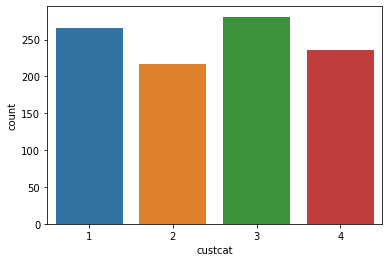

In [154]:
import seaborn
seaborn.countplot(d['custcat'])

In [146]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func= f_classif, k=4)
test.fit(dX,y)
pd.DataFrame(test.scores_)

,0
0,1.094872
1,41.310054
2,7.521435
3,3.499510
4,8.432945
5,6.689390
6,61.454293
7,16.975725
8,3.004734
9,0.373014


In [147]:
X=d[['marital','gender','reside','tenure', 'age', 'address', 'income', 'ed','employ']]

In [148]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=31)

In [149]:
#Train the model using the training sets
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=31, p=2,
           weights='uniform')

In [155]:
pred=knn.predict(X)
pred

array([1, 1, 3, 2, 1, 3, 2, 4, 3, 3, 4, 1, 1, 2, 1, 4, 3, 1, 1, 4, 1, 3,
       2, 3, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       3, 2, 3, 2, 1, 1, 3, 2, 1, 1, 2, 1, 2, 3, 1, 2, 2, 3, 1, 3, 3, 3,
       1, 2, 3, 1, 1, 1, 1, 2, 3, 1, 4, 1, 3, 4, 4, 1, 1, 3, 3, 3, 1, 2,
       1, 4, 1, 2, 2, 4, 1, 1, 1, 3, 3, 3, 1, 4, 1, 1, 3, 1, 1, 4, 1, 2,
       3, 2, 1, 2, 4, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 3, 3, 1,
       3, 2, 2, 1, 4, 1, 3, 4, 1, 3, 2, 2, 1, 4, 1, 2, 3, 2, 1, 2, 3, 3,
       4, 1, 4, 3, 1, 3, 4, 3, 3, 3, 3, 3, 2, 1, 1, 3, 3, 1, 4, 1, 4, 1,
       3, 2, 2, 1, 3, 1, 1, 2, 3, 3, 1, 3, 2, 3, 3, 1, 1, 2, 1, 1, 1, 3,
       1, 3, 4, 4, 2, 4, 4, 4, 2, 1, 3, 2, 4, 4, 3, 2, 4, 4, 2, 2, 3, 3,
       1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 2, 2, 2, 3, 1, 3, 2, 3,
       3, 2, 1, 2, 2, 1, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 4, 1, 3, 1, 3, 3,
       3, 2, 1, 3, 1, 1, 1, 2, 3, 3, 3, 2, 3, 3, 2, 1, 2, 4, 1, 3, 2, 1,
       3, 1, 1, 4, 1, 2, 1, 1, 3, 3, 3, 3, 4, 4, 2,

In [156]:
#Predict the response for test dataset
knn.predict(X).shape

(1000,)

In [157]:
knn.score(X,y)

0.424

In [159]:
#Model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [161]:
accuracy_score(y,pred)

0.424

In [162]:
confusion_matrix(y,pred)

array([[168,  23,  54,  21],
       [ 60,  76,  60,  21],
       [ 95,  42, 122,  22],
       [ 75,  40,  63,  58]])

Text(0.5, 257.44, 'Predicted label')

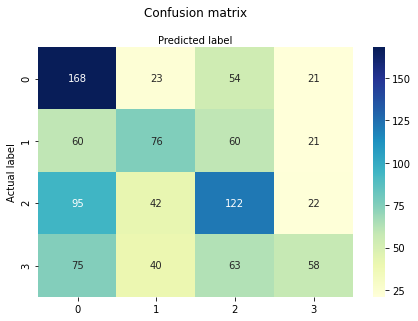

In [160]:
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [163]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           1       0.42      0.63      0.51       266
           2       0.42      0.35      0.38       217
           3       0.41      0.43      0.42       281
           4       0.48      0.25      0.32       236

   micro avg       0.42      0.42      0.42      1000
   macro avg       0.43      0.42      0.41      1000
weighted avg       0.43      0.42      0.41      1000

